# Project: Data Analysis of a Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#reference">Reference</a></li>
</ul>

<a id='intro'></a>
## Introduction

The movie database (TMDB) is a database that contains informations of about 10,000 movies which was gotten from kaggle. The database is made up 21 features. These are,  id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year	, budget_adj, and revenue_adj. From the proper inspection of the data, the following questions were coined out based on the features.

> **Questions**

1. Popularity: 
> + What is the most popular movie?
> + Does a movie popularity have effect on its commercial profitability?
> + What is the relationship between rating and popularity?
2. Director:
> + Who is the most popular movie director?
> + How many movies has he?she directed?
> + Who is the director with the highest released movies?
> + How many movies has he/she directed?
> + How successful are the movies in terms of profitability?
3. Profit:
> + What is the name of the movie with the highest profit?
> + What is the effect of rating on movie profitability?
4. Release year:
> + What is the year with the highest number of movie released?
> + How many movies were released?

In [2]:
# import of some useful libaries for data investigation

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

From the features present in the data and apart from cleaning the data, the features are also extraneous and there would be need to do away with some.

### General Properties

The data is a CSV file and would be loaded into the jupyter workspace

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df_movie = pd.read_csv('tmdb-movies.csv')
df_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df_movie.shape # the size of the dataset

(10866, 21)

In [6]:
df_movie.info() # checking for missing data in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
df_movie.dtypes # data types present in the dataset

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

From observation, the data is extraneous and the feautres that would be needed for analysis are: original_title, cast, director, runtime, genres, popularity, budget, revenue, release_year, vote_count and vote_average. The data is made up of 10,866 samples and 21 features, it also has some missing data. The features would have to be renamed for proper clearity.

### Data Dropping 

In [8]:
# dropping some columns as the data is extraneous

ext_data = ['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'budget_adj', 'revenue_adj']
df_movie.drop(columns= ext_data, inplace=True)

df_movie.head() # checking to confirm updated dataframe 

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


### Feature (Column) Renaming

In [9]:
# renaming columns for clarity

df_movie.rename(columns={'vote_average':'rating','original_title':'movie_title'}, inplace=True)
df_movie.head()

,popularity,budget,revenue,movie_title,cast,director,runtime,genres,vote_count,rating,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


### Features (Column) Reordering 

In [10]:
# reordering the columns

df_movie = df_movie.iloc[:, [3,4,5,6,7,0,1,2,10,8,9]]
df_movie.head()

,movie_title,cast,director,runtime,genres,popularity,budget,revenue,release_year,vote_count,rating
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,32.985763,150000000,1513528810,2015,5562,6.5
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,28.419936,150000000,378436354,2015,6185,7.1
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,13.112507,110000000,295238201,2015,2480,6.3
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,11.173104,200000000,2068178225,2015,5292,7.5
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,9.335014,190000000,1506249360,2015,2947,7.3


In [11]:
df_movie.isnull().sum() # checking features with null data

movie_title      0
cast            76
director        44
runtime          0
genres          23
popularity       0
budget           0
revenue          0
release_year     0
vote_count       0
rating           0
dtype: int64

In [12]:
df_movie.duplicated().sum() # checking for duplicates

1

In [13]:
# droping duplicates

df_movie.drop_duplicates(inplace=True)

df_movie.duplicated().any() # false

False

In [14]:
# drop rows with any null values in both datasets

df_movie.dropna(inplace=True)

df_movie.isnull().any() # false

movie_title     False
cast            False
director        False
runtime         False
genres          False
popularity      False
budget          False
revenue         False
release_year    False
vote_count      False
rating          False
dtype: bool

In [15]:
df_movie.isin(['0',0]).sum() # checking features for zero elements

movie_title        0
cast               0
director           0
runtime           28
genres             0
popularity         0
budget          5578
revenue         5888
release_year       0
vote_count         0
rating             0
dtype: int64

The zero element in the data is ambigious, this would be replaced with null values to protect the data integrity.

In [16]:
# replacing zero elements with null elements for data intergrity

cols =['budget','revenue','runtime']
df_movie[cols] = df_movie[cols].replace(['0',0], np.nan)

In [17]:
# confirming that there are no zero elements in the data

df_movie.isin(['0',0]).sum().any() # false

False

In [18]:
df_movie.shape # checking the shape of the data to confirm data integrity

(10731, 11)

<a id='eda'></a>
## Exploratory Data Analysis

To effectively carry out the data analysis process, so as to answer the questions posed earlier:    
It is important to identify the dependent and independent variables. From observing the data, it is intuitive tha the budget and revenue should be the dependent variable as this corresponds with popularity and higher movie quality.

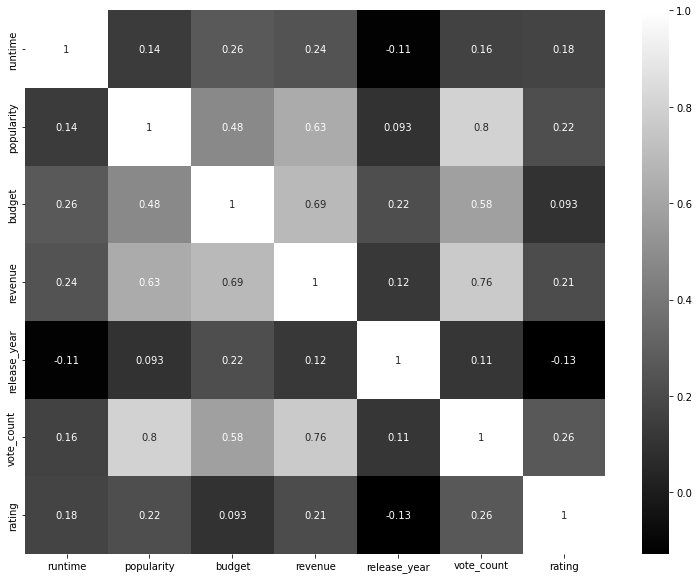

In [19]:
# using pearson correlation

plt.figure(figsize=(13,10))
mix = df_movie.corr()
sns.heatmap(mix,cmap=plt.cm.gray, annot=True);

In [20]:
# computing the general statistical summary

df_movie.describe()

,runtime,popularity,budget,revenue,release_year,vote_count,rating
count,10703.000000,10731.000000,5.153000e+03,4.843000e+03,10731.000000,10731.000000,10731.000000
mean,102.736896,0.652615,3.082824e+07,8.933981e+07,2001.259622,219.812972,5.964710
std,30.079331,1.004804,3.893199e+07,1.621546e+08,12.820151,578.815324,0.930283
min,3.000000,0.000188,1.000000e+00,2.000000e+00,1960.000000,10.000000,1.500000
25%,90.000000,0.210765,6.000000e+06,7.779664e+06,1995.000000,17.000000,5.400000
50%,99.000000,0.387081,1.750000e+07,3.191160e+07,2006.000000,39.000000,6.000000
75%,112.000000,0.720889,4.000000e+07,1.000000e+08,2011.000000,148.000000,6.600000
max,900.000000,32.985763,4.250000e+08,2.781506e+09,2015.000000,9767.000000,9.200000


From the correlation and general statistics table, the dependent variable is rating because it has a relatively normal ditribution.  

Now we can provide answers to the research questions.

### Popularity
 
> + What is the most popular movie?
> + Does a movie popularity have effect on its commercial profitability?
> + What is the relationship between rating and popularity?

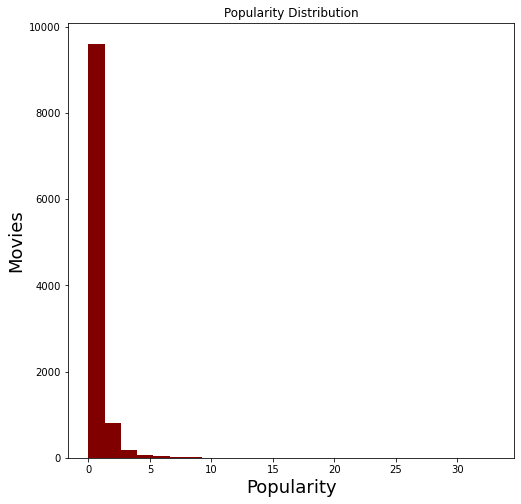

In [21]:
# plotting histogram for popularity

fig = plt.figure(figsize=(8,8))
x= df_movie['popularity']
plt.hist(x, bins=25, color='maroon')
plt.title('Popularity Distribution')
plt.ylabel('Movies', fontsize=18)
plt.xlabel('Popularity', fontsize=18);

The movies popularity is very low (about 90% are not popular).

In [22]:
# using query for filtering

popular_movie = df_movie.query('popularity == popularity.max()')
popular_movie

,movie_title,cast,director,runtime,genres,popularity,budget,revenue,release_year,vote_count,rating
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,32.985763,150000000.0,1.513529e+09,2015,5562,6.5


From checking the above output, the most popular movie is _Jurassic World_.  

To further proceed, the profit feature needs to be computed

In [23]:
# we divide the budget and revenue by one million to scale up with other features

df_movie['budget'] = df_movie['budget'] / 1000000
df_movie['revenue'] = df_movie['revenue'] / 1000000

In [24]:
df_movie['profit']=abs(df_movie['revenue'] - df_movie['budget'])
df_movie.head()

,movie_title,cast,director,runtime,genres,popularity,budget,revenue,release_year,vote_count,rating,profit
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,32.985763,150.0,1513.528810,2015,5562,6.5,1363.528810
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,28.419936,150.0,378.436354,2015,6185,7.1,228.436354
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,13.112507,110.0,295.238201,2015,2480,6.3,185.238201
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,11.173104,200.0,2068.178225,2015,5292,7.5,1868.178225
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,9.335014,190.0,1506.249360,2015,2947,7.3,1316.249360


In [25]:
# taking 75% and above as high profit margin, also taking 25% and less as low profit margin

high_profit = df_movie.query('profit >= 83.060858') # >=75%
low_profit = df_movie.query('profit <= 8.199698') # <=25%
medium_profit = df_movie.query('profit > 8.199698')

high_profit.shape, low_profit.shape

((963, 12), (962, 12))

In [26]:
# getting the most popular movies in ascending order

most_popular = df_movie.sort_values(by=['popularity'], ascending=False)
most_popular.shape

(10731, 12)

In [27]:
# getting the most profitable movies in ascending order

most_profitable = high_profit.sort_values(by=['profit'], ascending=False)
most_profitable.shape

(963, 12)

In [28]:
# computing the percentage of popular movies that are most profitable for top 200 samples

most_popular.head(200).index.isin(most_profitable.head(200).index).sum() / most_popular.head(200).shape[0] * 100

48.5

From the computation output, it can be noticed that movies popularity does not signify its commercial profitability. This is because only 49% of popular miovies are highly profitable.  

Next is to consider how rating contributes to a movie popularity through visualization:

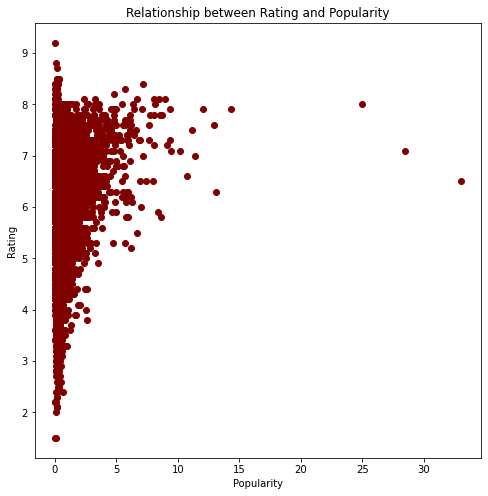

In [30]:
# line plotting to see the correlation between rating and popularity

fig = plt.figure(figsize=(8,8))
x = df_movie['popularity']
y = df_movie['rating']
plt.scatter(x, y, alpha=1, color='maroon')
plt.title('Relationship between Rating and Popularity')
plt.xlabel('Popularity')
plt.ylabel('Rating');

From the plotted grapgh, it shows that there are no correlation between rating and popularity. Hence, the rating of movies does not determine its popularity. 

### Director 

> + Who is the most popular movie director?
> + How many movies has he/she directed?
> + Who is the director with the highest released movies?
> + How many movies has he/she directed?
> + How successful are the movies in terms of profitability?

The director column contains multiple values that are seperated by a delimeter. A function would be introduced to take care to split the data.

In [33]:
# function to split the mutiple data in the director column

def split_multiple_value(df, column, delimeter):
    '''
    Args: df is the data frame (pd.DataFrame) that contains the mutiple value column
          column is the column that contains the multiple value (str)
          delimeter is the seperator string (str) or character involved
    
    Returns: the function returns the copy of an exploded data frame
    '''
    # copy dataframe
    df_copy = df.copy()
    
    # splitting the seperated strings
    df_copy[column] = df_copy[column].str.split(delimeter)
    
    return df_copy.explode(column) # explodes the dataset with respect to the column splitted

In [34]:
# getting the data frame that contains the splitted columns

df_director = split_multiple_value(df_movie, 'director', '|')
df_director.shape

(11774, 12)

In [35]:
# checking to be sure the director column was properly seperated

df_director.head(10)

,movie_title,cast,director,runtime,genres,popularity,budget,revenue,release_year,vote_count,rating,profit
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,32.985763,150.0,1513.528810,2015,5562,6.5,1363.528810
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,28.419936,150.0,378.436354,2015,6185,7.1,228.436354
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,13.112507,110.0,295.238201,2015,2480,6.3,185.238201
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,11.173104,200.0,2068.178225,2015,5292,7.5,1868.178225
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,9.335014,190.0,1506.249360,2015,2947,7.3,1316.249360
5,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156.0,Western|Drama|Adventure|Thriller,9.110700,135.0,532.950503,2015,3929,7.2,397.950503
6,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125.0,Science Fiction|Action|Thriller|Adventure,8.654359,155.0,440.603537,2015,2598,5.8,285.603537
7,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141.0,Drama|Adventure|Science Fiction,7.667400,108.0,595.380321,2015,4572,7.6,487.380321
8,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda,91.0,Family|Animation|Adventure|Comedy,7.404165,74.0,1156.730962,2015,2893,6.5,1082.730962
8,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Pierre Coffin,91.0,Family|Animation|Adventure|Comedy,7.404165,74.0,1156.730962,2015,2893,6.5,1082.730962


In [36]:
# grouping by director, taking the max of the 'popularity' column and then taking the index
# of the max value

df_director.groupby('director')['popularity'].max().idxmax()

'Colin Trevorrow'

The most popular director is _Colin Trevorrow_. Next is to check for: the number of movies directed?

In [39]:
# using query for filtering

colin_trevorrow_movies = df_director.query('director == "Colin Trevorrow"')
colin_trevorrow_movies[['movie_title','popularity','release_year','profit']]

,movie_title,popularity,release_year,profit
0,Jurassic World,32.985763,2015,1363.528810
4604,Safety Not Guaranteed,0.408010,2012,3.257792


From the ouput, it is very clear that _Colin Trevorrow_ directed only two movies which are _Jurassic World_ and _Safety Not Guaranteed_.  

Who is the director with the highest released movies

In [40]:
# grouping by director, taking the count of the 'movie_title' column and then taking the index
# of the max value 

highest_movie_director = df_director.groupby('director')['movie_title'].count().idxmax()
highest_movie_director

'Woody Allen'

_Woody Allen_ is the director with the highest movie released. Next is to get the number of movies directed?

In [41]:
woody_allen_movies = df_director.query('director == "Woody Allen"')
woody_allen_movies.shape

(46, 12)

_Woody Allen_ directed _46 movies_ in total.  

Next is to check for the top profitable movies (>= 75% profit) 

In [42]:
# getting the number of movies that made it to the high profitable margin

woody_high_profit = high_profit[high_profit.index.isin(woody_allen_movies.index)]

# getting the number of movies that made it to the low profitable margin

woody_low_profit = low_profit[low_profit.index.isin(woody_allen_movies.index)]

# counting the movies

print(woody_high_profit.shape[0])
print(woody_low_profit.shape[0])

1
5


The output above shows that of the total of _46 movies_ directed by _Woody Allen_, only one was highly profitable (graater than 75% profit) while five were least profitable (less than 25% profit).  


### Profit

> + What is the name of the movie with the highest profit?
> + What is the effect of rating on movie profitability?

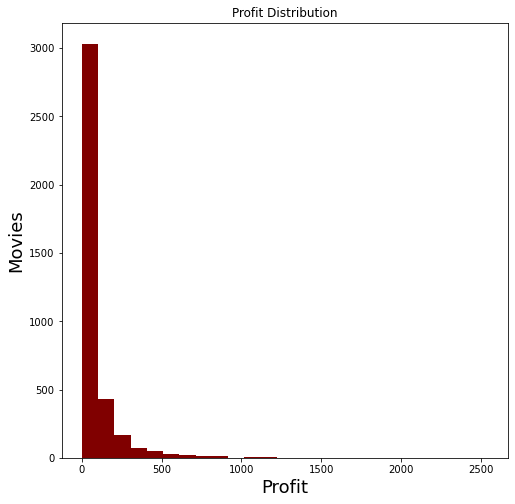

In [43]:
# plotting histogram for profit

fig = plt.figure(figsize=(8,8))
x= df_movie['profit']
plt.hist(x, bins =25, color='maroon')
plt.title('Profit Distribution')
plt.ylabel('Movies', fontsize=18)
plt.xlabel('Profit', fontsize=18);

Most of the movies made profit between 0 - 100 million. 

Next is to get the movie with the highest profit using visualization

In [45]:
# considering the top 10 most profitable movies

highest_movies = high_profit.sort_values(by=['profit'], ascending=False).head(10)
highest_movies

,movie_title,cast,director,runtime,genres,popularity,budget,revenue,release_year,vote_count,rating,profit
1386,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,9.432768,237.0,2781.505847,2009,8458,7.1,2544.505847
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,11.173104,200.0,2068.178225,2015,5292,7.5,1868.178225
5231,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194.0,Drama|Romance|Thriller,4.355219,200.0,1845.034188,1997,4654,7.3,1645.034188
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,32.985763,150.0,1513.528810,2015,5562,6.5,1363.528810
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,9.335014,190.0,1506.249360,2015,2947,7.3,1316.249360
4361,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143.0,Science Fiction|Action|Adventure,7.637767,220.0,1519.557910,2012,8903,7.3,1299.557910
3374,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,130.0,Adventure|Family|Fantasy,5.711315,125.0,1327.817822,2011,3750,7.7,1202.817822
14,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141.0,Action|Adventure|Science Fiction,5.944927,280.0,1405.035767,2015,4304,7.4,1125.035767
5422,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,102.0,Animation|Adventure|Family,6.112766,150.0,1274.219009,2013,3369,7.5,1124.219009
8094,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,114.0,Crime|Drama|Mystery|Thriller|Action,1.136610,22.0,1106.279658,1995,201,5.6,1084.279658


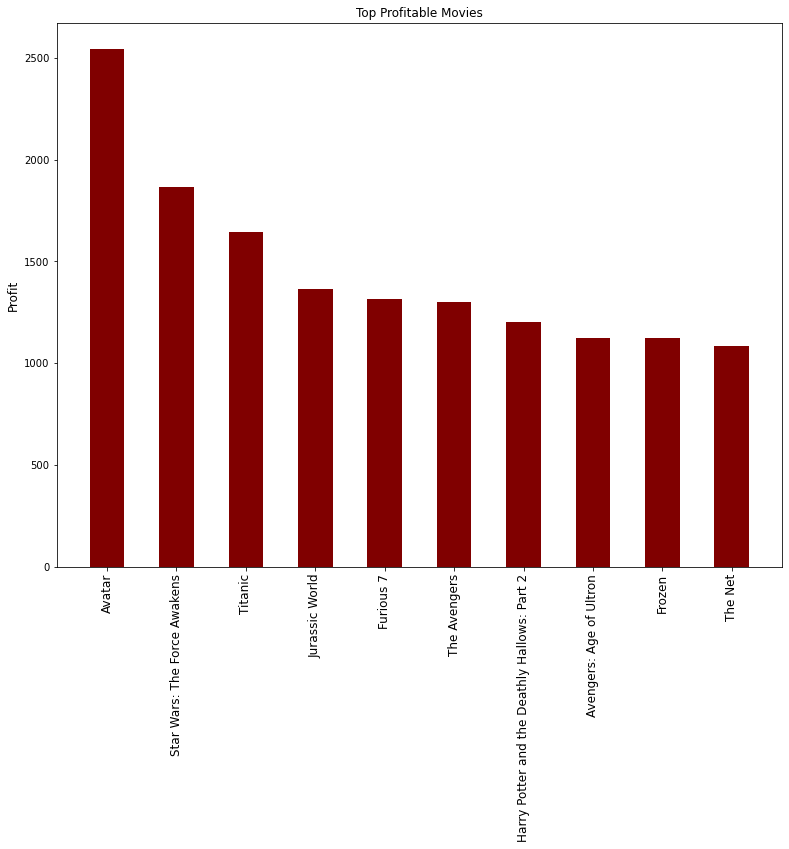

In [48]:
# plotting bar chart

fig = plt.figure(figsize=(13,10))
movies = list(highest_movies['movie_title'])
profits = list(highest_movies['profit'])
plt.bar(movies, profits, color='maroon', alpha=1, width = 0.5)
plt.title('Top Profitable Movies', fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Profit', fontsize=12);

This shows that _Avatar_ is the most profitable movie ever released from 1960 - 2015.  

Next is how is effect of rating on profit

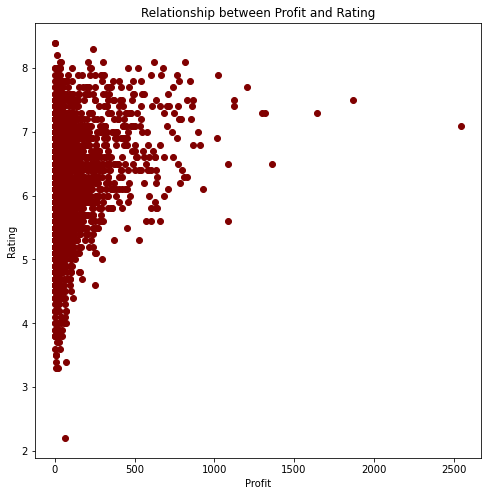

In [49]:
# using the scatter plot to get the relationship

fig = plt.figure(figsize=(8,8))
x = df_movie['profit']
y = df_movie['rating']
plt.scatter(x, y, alpha=1, color='maroon')
plt.title('Relationship between Profit and Rating')
plt.xlabel('Profit')
plt.ylabel('Rating');

From the plot above it is obvious that there is no correlation between the profit made and rating. Hence the rating of a movie does not determine how much profiut it would generate.

### Release year

> + What is the year with the highest number of movie released?
> + How many movies were released?

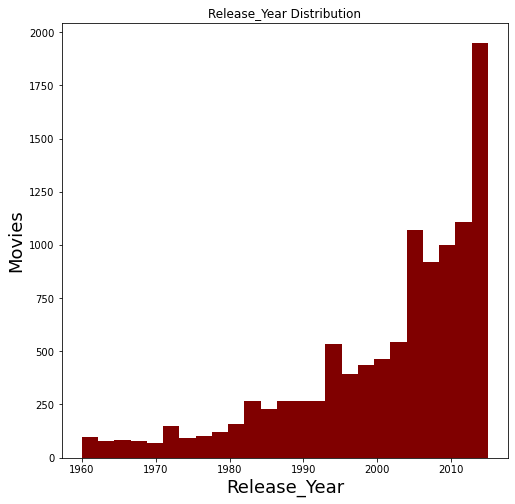

In [50]:
# plotting histogram for profit

fig = plt.figure(figsize=(8,8))
x= df_movie['release_year']
plt.hist(x, bins =25, color='maroon')
plt.title('Release_Year Distribution')
plt.ylabel('Movies', fontsize=18)
plt.xlabel('Release_Year', fontsize=18);

Most movies were released within 2010 - 2015.  

What is the year with the highest number of movies released?

In [51]:
# groupby release year, count the number of movies per year then convert to a dict

movie_count = dict(df_movie.groupby('release_year')['movie_title'].count())

# convert the dict to a dataframe

df_year = pd.DataFrame.from_dict(movie_count.items())
df_year.rename(columns = {0:'release_year', 1:'num_movie'}, inplace=True) # rename the columns

df_year.head() # checking to confirm output

,release_year,num_movie
0,1960,32
1,1961,31
2,1962,32
3,1963,34
4,1964,42


In [52]:
# using query to filter

highest_release_year = df_year.query('num_movie == num_movie.max()')
highest_release_year

,release_year,num_movie
54,2014,682


From the above, 2014 is the year with the highest number of released movies with a total of 680.

<a id='conclusions'></a>
## Conclusions

> The dataset lacked consistency. The data wrangling process consisted of dropping the null values, renaming and reordering the features (columns). The null values in the dataset was dropped because they were so little compared to the overall sample data. The zero values in the features were filled with null values so as to protect the data intergrity as they were so ambigious and dropping them would result in losing more than half of the sample data collected. The features were also renamed and reordered for clarity. 

> The profit feature generated was computed by subtracting the budget from revenue. This was to ensure proper evaluation of coined research questions. The profit feature at the 75% percentile was set to be the margin for high profitability while that of 25% percentile was the margin for low profitability. The rating feature was found to be the dependent variable as it has a relatively normal distribution when compared to the other features.

> For the ease of analysis, research questions were coined out based on the features of the dataset. In the first case, the popularity feature was addressed. From the distribution, about 90% of the movies released were not popular. In analyzing how profitable the top 200 most popular movies are; about 49% of the movies were profitable. Indicating that there is no so much correlation in profit compared to their popularity. Also, in terms of rating the popularity showed no relationship in the scattered plot.

> In the case of the director feature, Colin Trevorrow was the most popular director and he directed only two movies which made him popular in return. Also, Woody Allen was the director with the highest number of movies released. He released 46 movies with only one being highly profitable.

> In the case of the profit feature, most movies made profit within 0 - 100 Million. However, the movie with the highest profit generated was Avatar. In terms of rating, profitability showed no correlation.

> Finally, in the case of the release_year feature, most of the movies were released within 2010 - 2015. However, 2014 was the year with th highest number of movies released. A total of 680 movies were released.  

> # Limitations  
> The movie database (TMDB) contains one of the best collection of movies. Most feautures (columns) had null values and lots of outliers. The outliers in most features were out of range, making comparism between features very difficult. Furthermore the features had thousands of zero values. For example the budget and revenue features had 5,578 and 5,888 respectively. However, the zero values was not dropped but replaced with null values to protect the data intergrity. This lack of consistency in the dataset caused some set backs in the analysis carried out.

<a id='reference'></a>
## Reference

The following are the links to the resources utilized in carrying out the analysis of the movie database (TMBD):

> + [The most influential factor of IMDB movie rating](https://medium.com/@yd334/the-most-influential-factor-of-imdb-movie-rating-part-ii-data-analysis-and-statistical-modeling-c6300b8d7d4d)  
> + [What makes a movie hit a jackpot](https://towardsdatascience.com/what-makes-a-movie-hit-a-jackpot-learning-from-data-with-multiple-linear-regression-339f6c1a7022) 
> + [The TMDB 5000 movie dataset](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)  
> + [TMDB movies analysis](https://www.kaggle.com/code/betizazualemu/tmdb-movies-analysis-ipynb)  
> + [Pandas DataFrame groupby function for grouping features](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)  
> + [How to plot a pandas dataframe with matplotlib](https://www.geeksforgeeks.org/how-to-plot-a-pandas-dataframe-with-matplotlib/)  
> + [The query function in pandas dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html)  
> + [Dropping null values in pandas dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)  
> + [Exploding elements in pandas dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html)
